In [1]:
pip install keras


The following command must be run outside of the IPython shell:

    $ pip install keras

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
pip install Keras


The following command must be run outside of the IPython shell:

    $ pip install Keras

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
import matplotlib as mbl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
%matplotlib inline

In [153]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
t1=pd.read_csv("test_1.csv")
t2=pd.read_csv("test_1.csv")
t2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [100]:
train1=train.copy()
test1=test.copy()
test2=test1.copy()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1


In [17]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [19]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
train.shape,test.shape

((614, 13), (367, 12))

In [83]:
train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

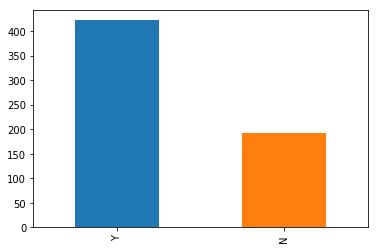

In [22]:
train['Loan_Status'].value_counts().plot.bar()


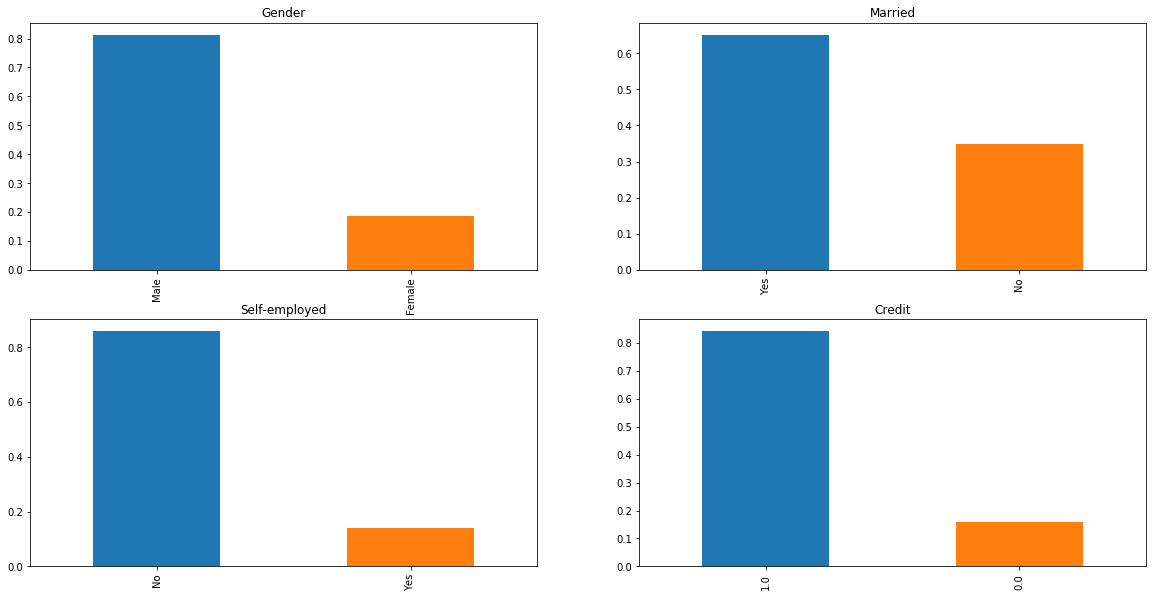

In [23]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self-employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit')

plt.show()


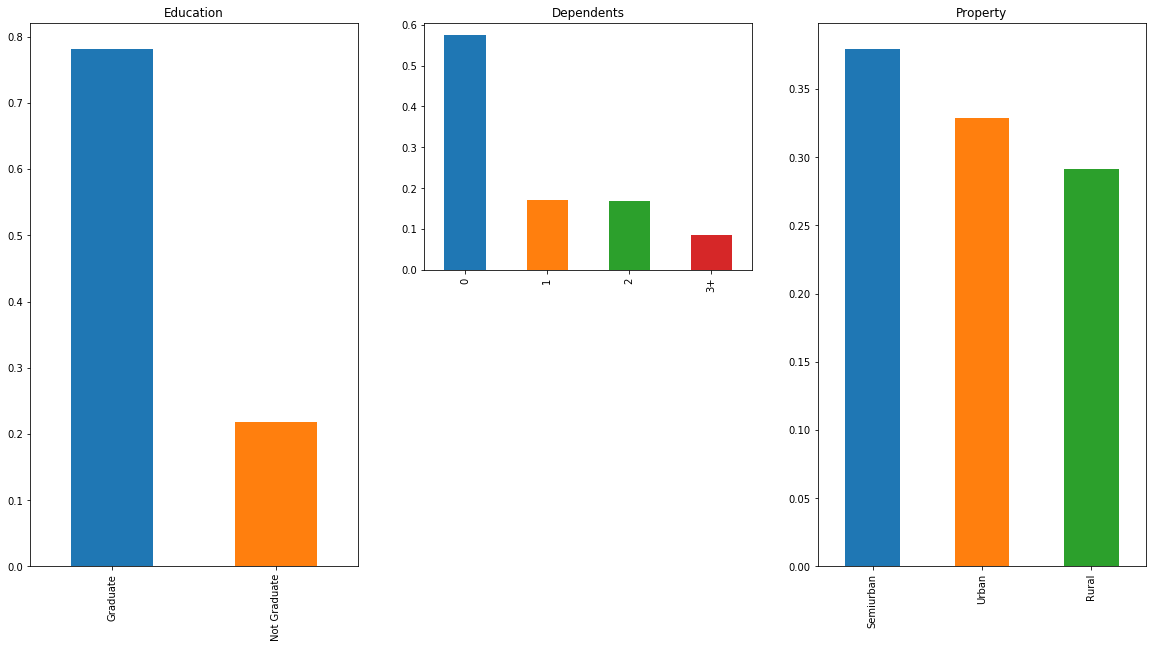

In [27]:
plt.figure(2)

plt.subplot(131)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')

plt.subplot(232)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property')

plt.show()

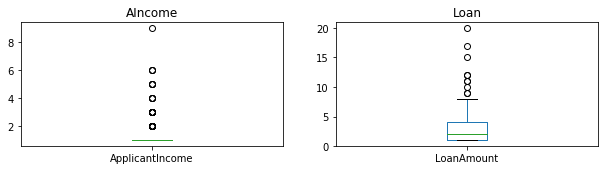

In [32]:
plt.figure(1)
plt.subplot(121)


plt.subplot(231)
train['ApplicantIncome'].value_counts().plot.box(figsize=(16,5),title='AIncome')
plt.subplot(232)
train['LoanAmount'].value_counts().plot.box(figsize=(16,5),title='Loan')
plt.show()

Text(0.5,0.98,' ')

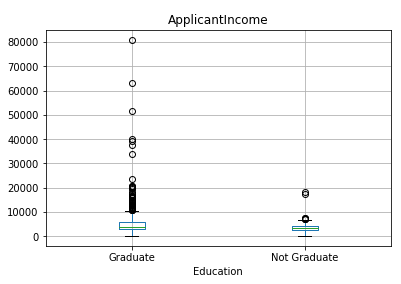

In [29]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")

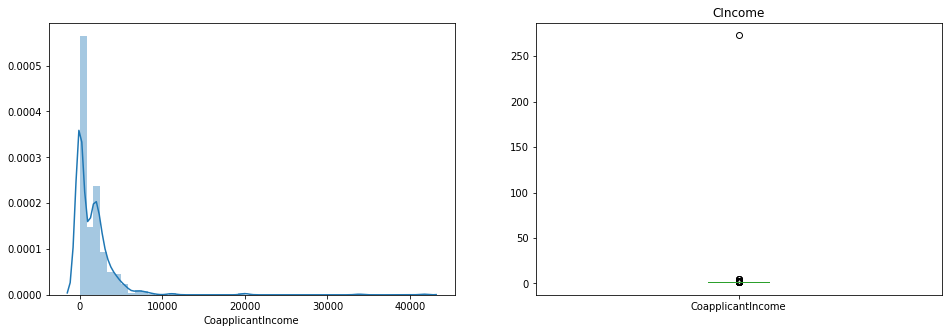

In [33]:
plt.figure(1)

plt.subplot(121)
sb.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].value_counts().plot.box(figsize=(16,5),title='CIncome')
plt.show()

Text(0.5,0.98,' ')

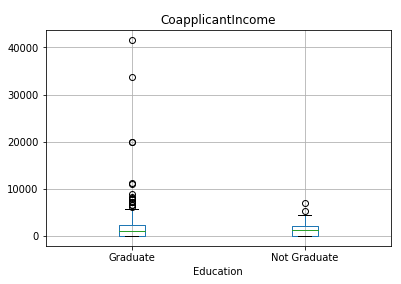

In [34]:
train.boxplot(column='CoapplicantIncome',by='Education')
plt.suptitle(" ")

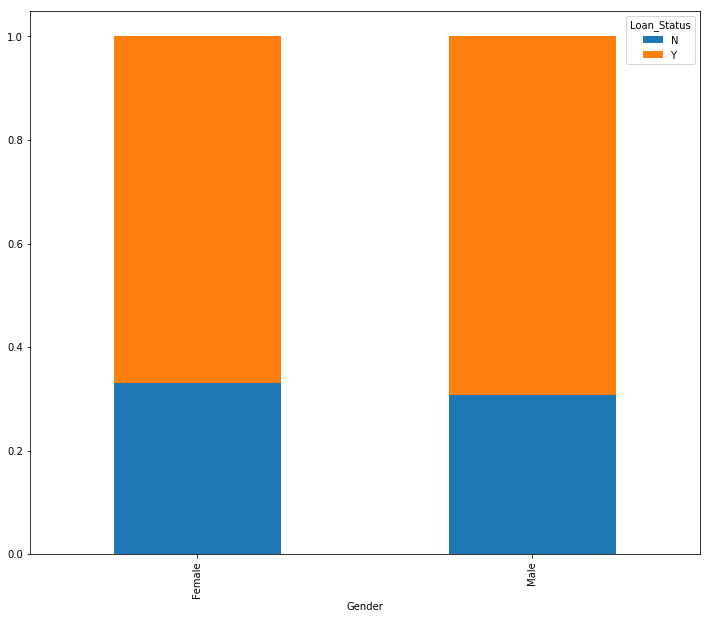

In [37]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(12,10))

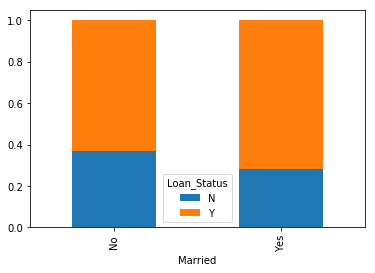

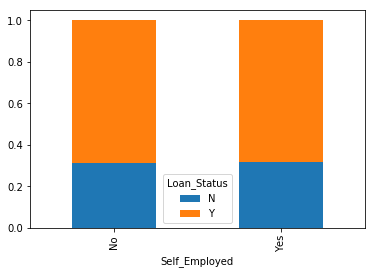

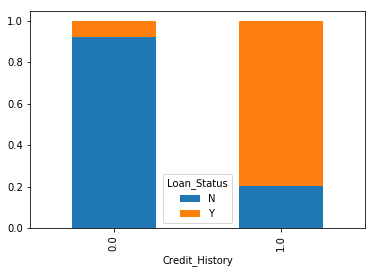

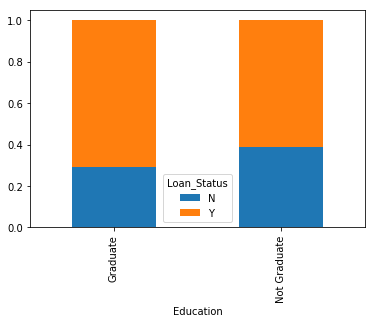

In [38]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Self=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Self.div(Self.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
History.div(History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


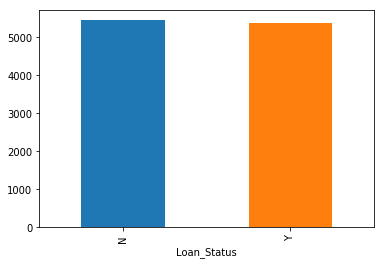

In [48]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [40]:
bins=[0,2000,4000,6000,8000]
groups=['Low','Average','High','Very High']
train['Income']=pd.cut(train['ApplicantIncome'],bins,labels=groups)


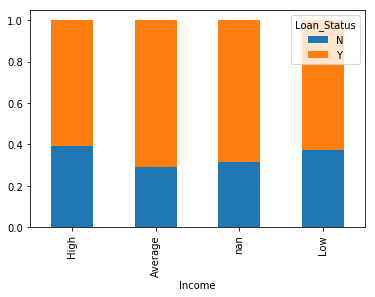

In [41]:
Income_bin=pd.crosstab(train['Income'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [42]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [43]:
bins=[0,2500,4000,6000,8000]
groups=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['Total_Income'],bins,labels=groups)

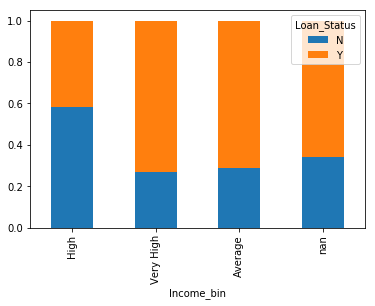

In [44]:
total=pd.crosstab(train['Income_bin'],train['Loan_Status'])
total.div(total.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [45]:
train=train.drop(['Income','Income_bin','Total_Income'],axis=1)

In [46]:
train['Dependents'].replace('3+',3,inplace=True)
t1['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

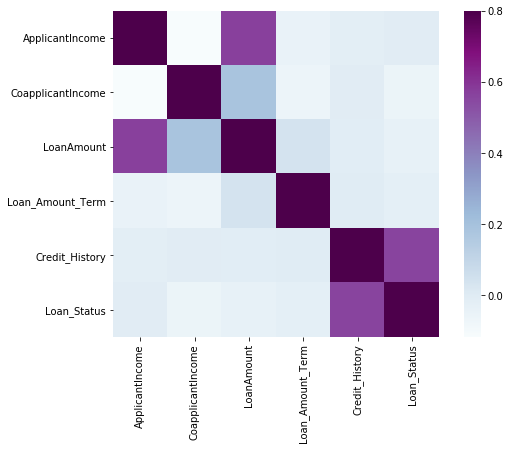

In [47]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sb.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

In [86]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [128]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
t1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [90]:
train['LoanAmount'].fillna((train['LoanAmount'].median()),inplace=True)
train['Loan_Amount_Term'].fillna((train['Loan_Amount_Term'].median()),inplace=True)


In [129]:
t1['Gender'].fillna(t1['Gender'].mode()[0],inplace=True)
t1['Married'].fillna(t1['Married'].mode()[0],inplace=True)
t1['Credit_History'].fillna(t1['Credit_History'].mode()[0],inplace=True)
t1['Self_Employed'].fillna(t1['Self_Employed'].mode()[0],inplace=True)
t1['Dependents'].fillna(t1['Dependents'].mode()[0],inplace=True)
t1['LoanAmount'].fillna((t1['LoanAmount'].median()),inplace=True)
t1['Loan_Amount_Term'].fillna((t1['Loan_Amount_Term'].median()),inplace=True)
t1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

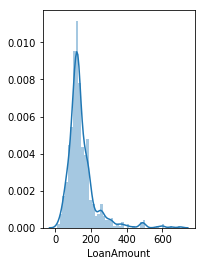

In [52]:
plt.figure(1)
plt.subplot(121)
sb.distplot(train['LoanAmount'])
train['LoanAmountLog']=np.log(train['LoanAmount'])

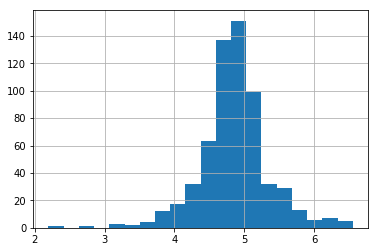

In [53]:
train['LoanAmountLog'].hist(bins=20)


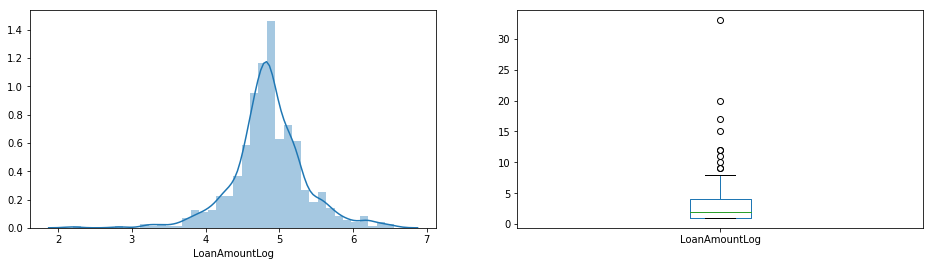

In [54]:
plt.figure(1)
plt.subplot(121)
sb.distplot(train['LoanAmountLog'])
plt.subplot(122)
train['LoanAmountLog'].value_counts().plot.box(figsize=(16,4))
plt.show()

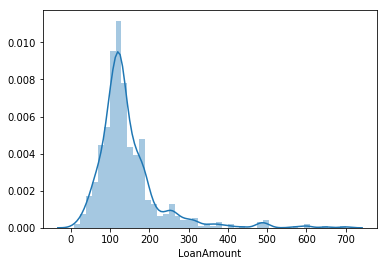

In [55]:
sb.distplot(train['LoanAmount']);

In [142]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
t1=pd.get_dummies(t1)
t1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1


In [131]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [132]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
pred=model.predict(x_cv)

In [134]:
accuracy_score(pred,y_cv)

0.8

In [137]:
t1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1


In [147]:
# Get missing columns in the training test
missing_cols = set( train.columns ) - set( t1.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    t1[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
t1 = t1[train.columns]
t1=t1.drop('Loan_ID_LP001002',1)
t1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5720,0,110.0,360.0,1.0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,3076,1500,126.0,360.0,1.0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,5000,1800,208.0,360.0,1.0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,2340,2546,100.0,360.0,1.0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,3276,0,78.0,360.0,1.0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [148]:
pred_test=model.predict(t1)

In [150]:
submission=pd.read_csv('Submission.csv')

In [154]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=t2['Loan_ID']

In [157]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [158]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Result.csv')